# Pre Processing


In [1]:
# Step 1: Set up the environment and import necessary libraries
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

In [2]:

# Load the dataset
df = pd.read_csv('C:\\Users\\chris\\OneDrive\\Desktop\\Github\\KAN\\DataCoSupplyChainDataset.csv', header=0, encoding='unicode_escape')

In [3]:
df.shape

(180519, 53)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [6]:

# Combine first and last names into a full name column
df['Cust_Full_Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)


In [7]:
df.select_dtypes(include=['object']).describe()

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,...,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode,Cust_Full_Name
count,180519,180519,180519,180519,180519,180519,180519,180511,180519,180519,...,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519
unique,4,4,50,563,2,1,782,1109,1,3,...,164,65752,23,1089,9,118,118,63701,4,14033
top,DEBIT,Late delivery,Cleats,Caguas,EE. UU.,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,...,Estados Unidos,12/14/2016 12:29,Central America,Inglaterra,COMPLETE,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,1/5/2016 5:58,Standard Class,MarySmith
freq,69295,98977,24551,66770,111146,180519,65150,64104,180519,93504,...,24840,5,28341,6722,59491,24515,24515,10,107752,23884


# Data Cleaning

In [8]:

# Drop unnecessary columns
data = df.drop(['Customer Email', 'Product Status', 'Customer Password', 'Customer Street', 'Customer Fname',
                'Customer Lname', 'Latitude', 'Longitude', 'Product Description', 'Product Image', 'Order Zipcode',
                'shipping date (DateOrders)'], axis=1)


In [9]:

# Drop rows with missing values in 'Product Price' and 'Shipping Mode'
data = data.dropna(subset=['Product Price', 'Shipping Mode'])

In [10]:

# Split order dates into year, month, day, and hour
data['order_yr'] = pd.DatetimeIndex(data['order date (DateOrders)']).year
data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month
data['order_day'] = pd.DatetimeIndex(data['order date (DateOrders)']).weekday
data['order_hour'] = pd.DatetimeIndex(data['order date (DateOrders)']).hour

# Visulizations

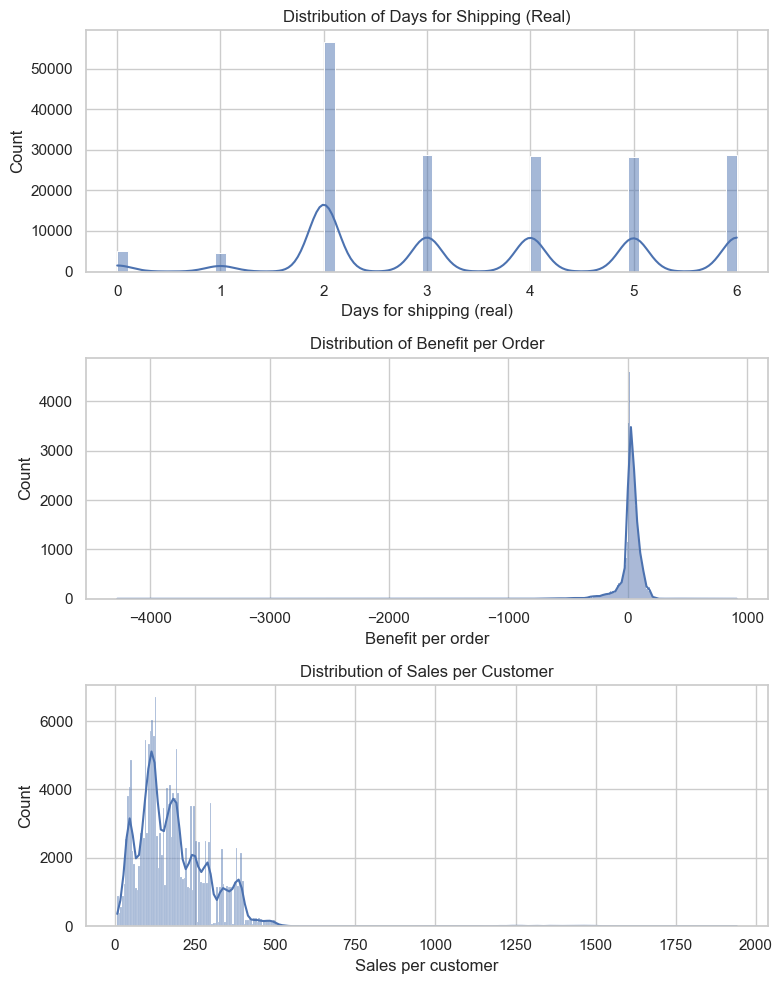

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style for the plots
sns.set(style="whitegrid")

# Step 1: Distribution of Key Numerical Variables
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Histogram of Days for shipping (real)
sns.histplot(data, x='Days for shipping (real)', kde=True, ax=axs[0])
axs[0].set_title('Distribution of Days for Shipping (Real)')

# Histogram of Benefit per order
sns.histplot(data, x='Benefit per order', kde=True, ax=axs[1])
axs[1].set_title('Distribution of Benefit per Order')

# Histogram of Sales per Customer
sns.histplot(data, x='Sales per customer', kde=True, ax=axs[2])
axs[2].set_title('Distribution of Sales per Customer')

# Step 2: Categorical Data Analysis (in subsequent cells due to plot size considerations)
plt.tight_layout()
plt.show()


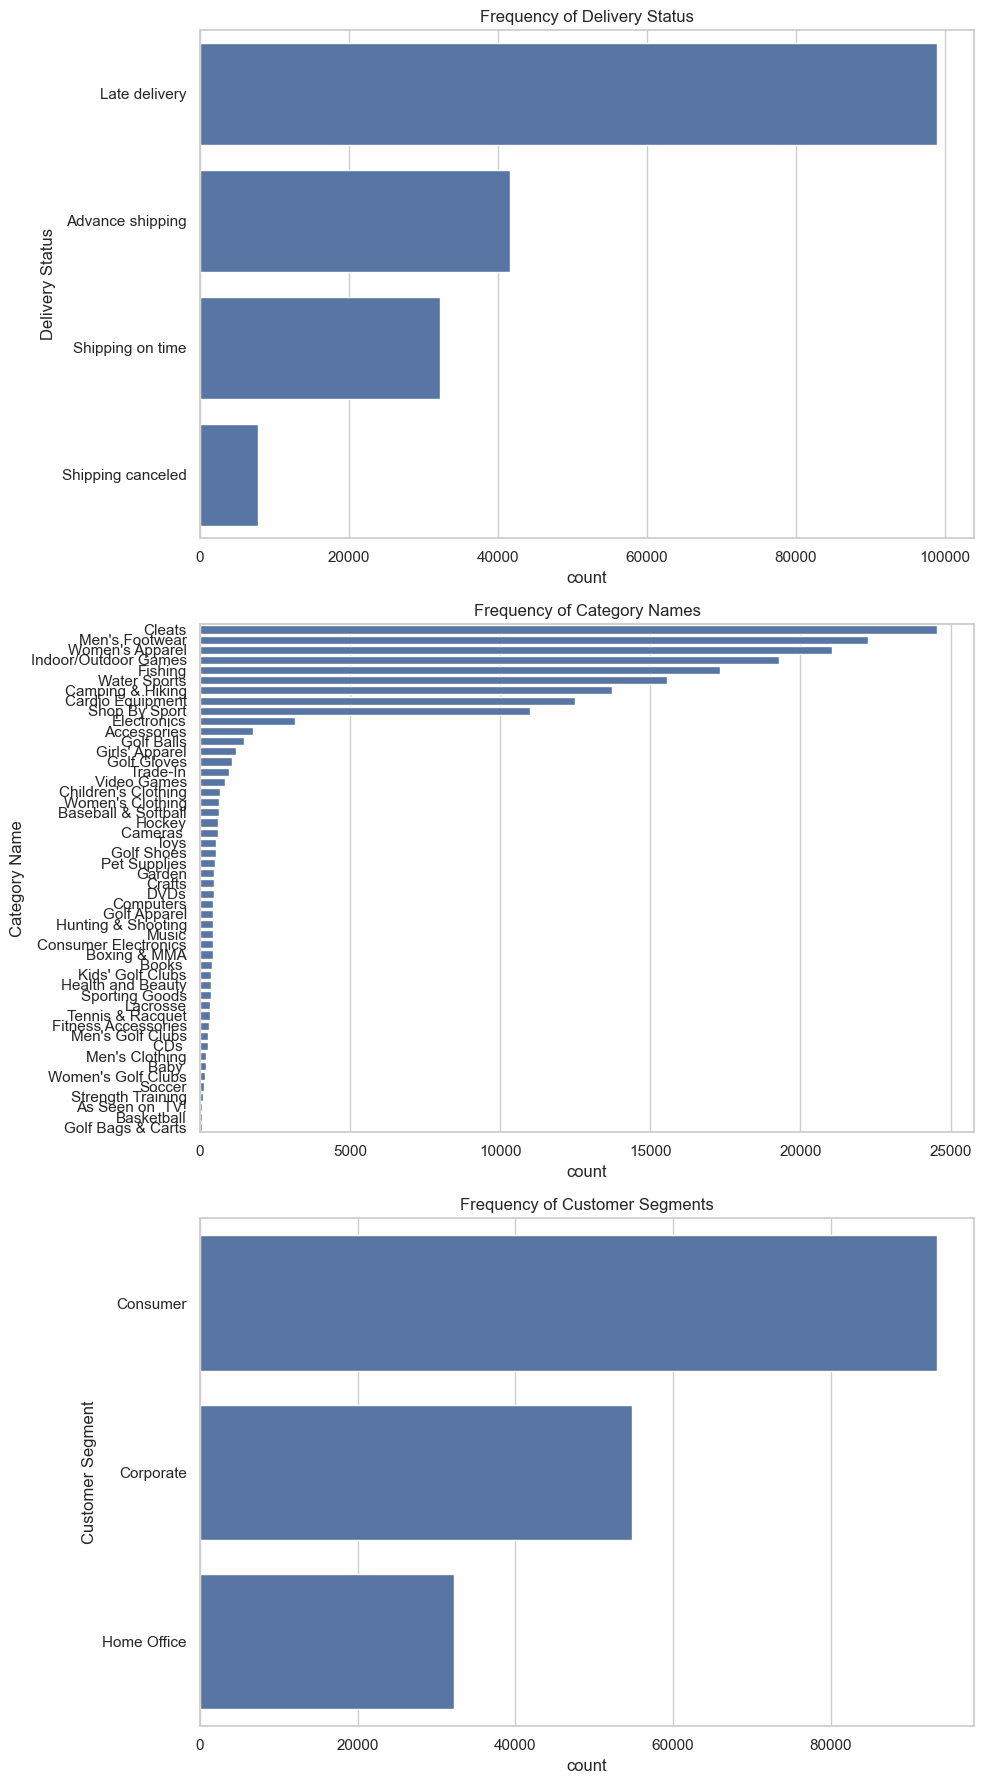

In [12]:
#  Categorical Data Analysis
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Bar plot of Delivery Status
sns.countplot(data, y='Delivery Status', order=data['Delivery Status'].value_counts().index, ax=axs[0])
axs[0].set_title('Frequency of Delivery Status')

# Bar plot of Category Name
sns.countplot(data, y='Category Name',  order=data['Category Name'].value_counts().index, ax=axs[1])
axs[1].set_title('Frequency of Category Names')

# Bar plot of Customer Segment
sns.countplot(data, y='Customer Segment',  order=data['Customer Segment'].value_counts().index, ax=axs[2])
axs[2].set_title('Frequency of Customer Segments')

plt.tight_layout()
plt.show()


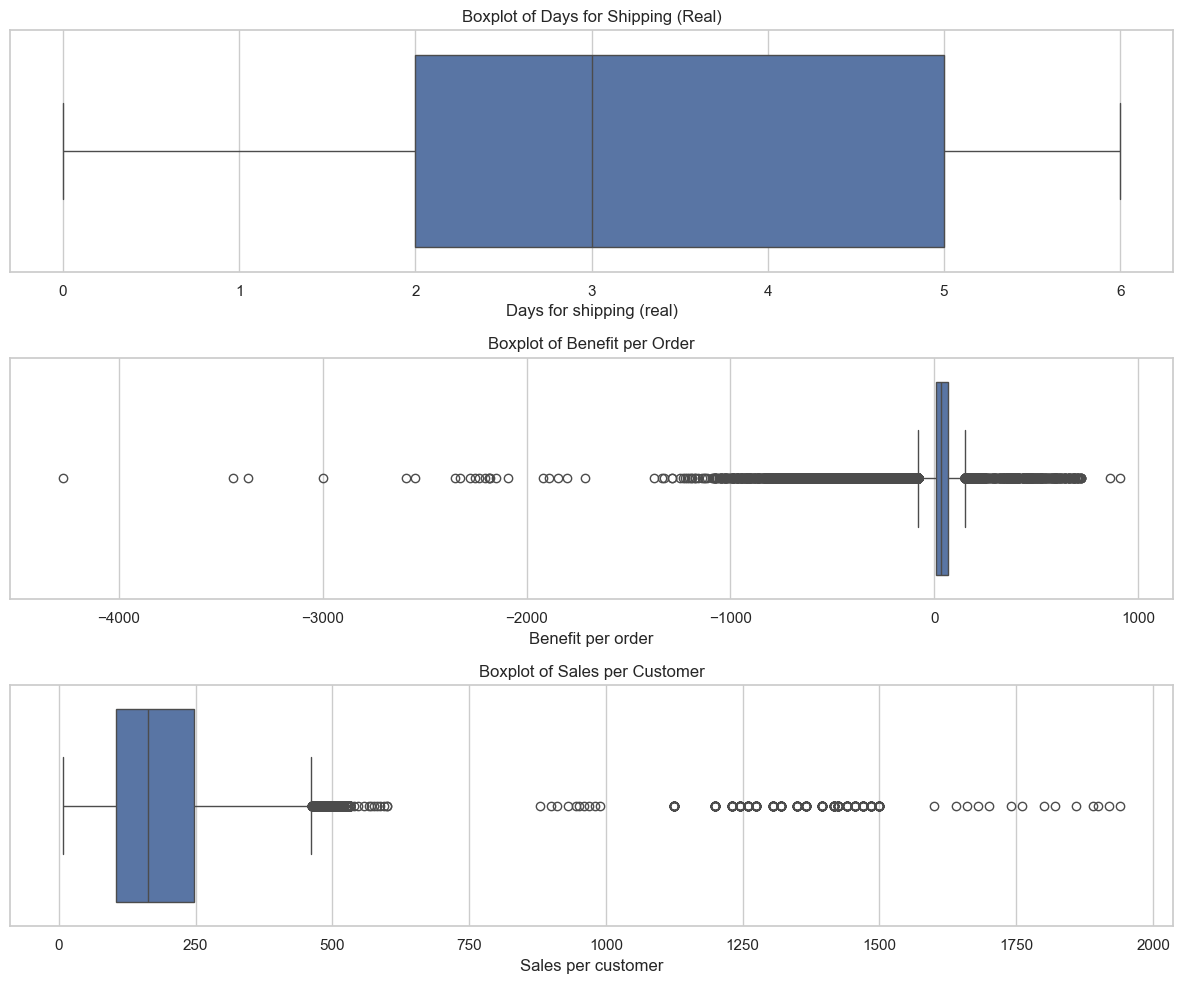

In [13]:
#  Outliers Detection
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Boxplot for Days for shipping (real)
sns.boxplot(data, x='Days for shipping (real)', ax=axs[0])
axs[0].set_title('Boxplot of Days for Shipping (Real)')

# Boxplot for Benefit per order
sns.boxplot(data, x='Benefit per order', ax=axs[1])
axs[1].set_title('Boxplot of Benefit per Order')

# Boxplot for Sales per customer
sns.boxplot(data, x='Sales per customer', ax=axs[2])
axs[2].set_title('Boxplot of Sales per Customer')

plt.tight_layout()
plt.show()

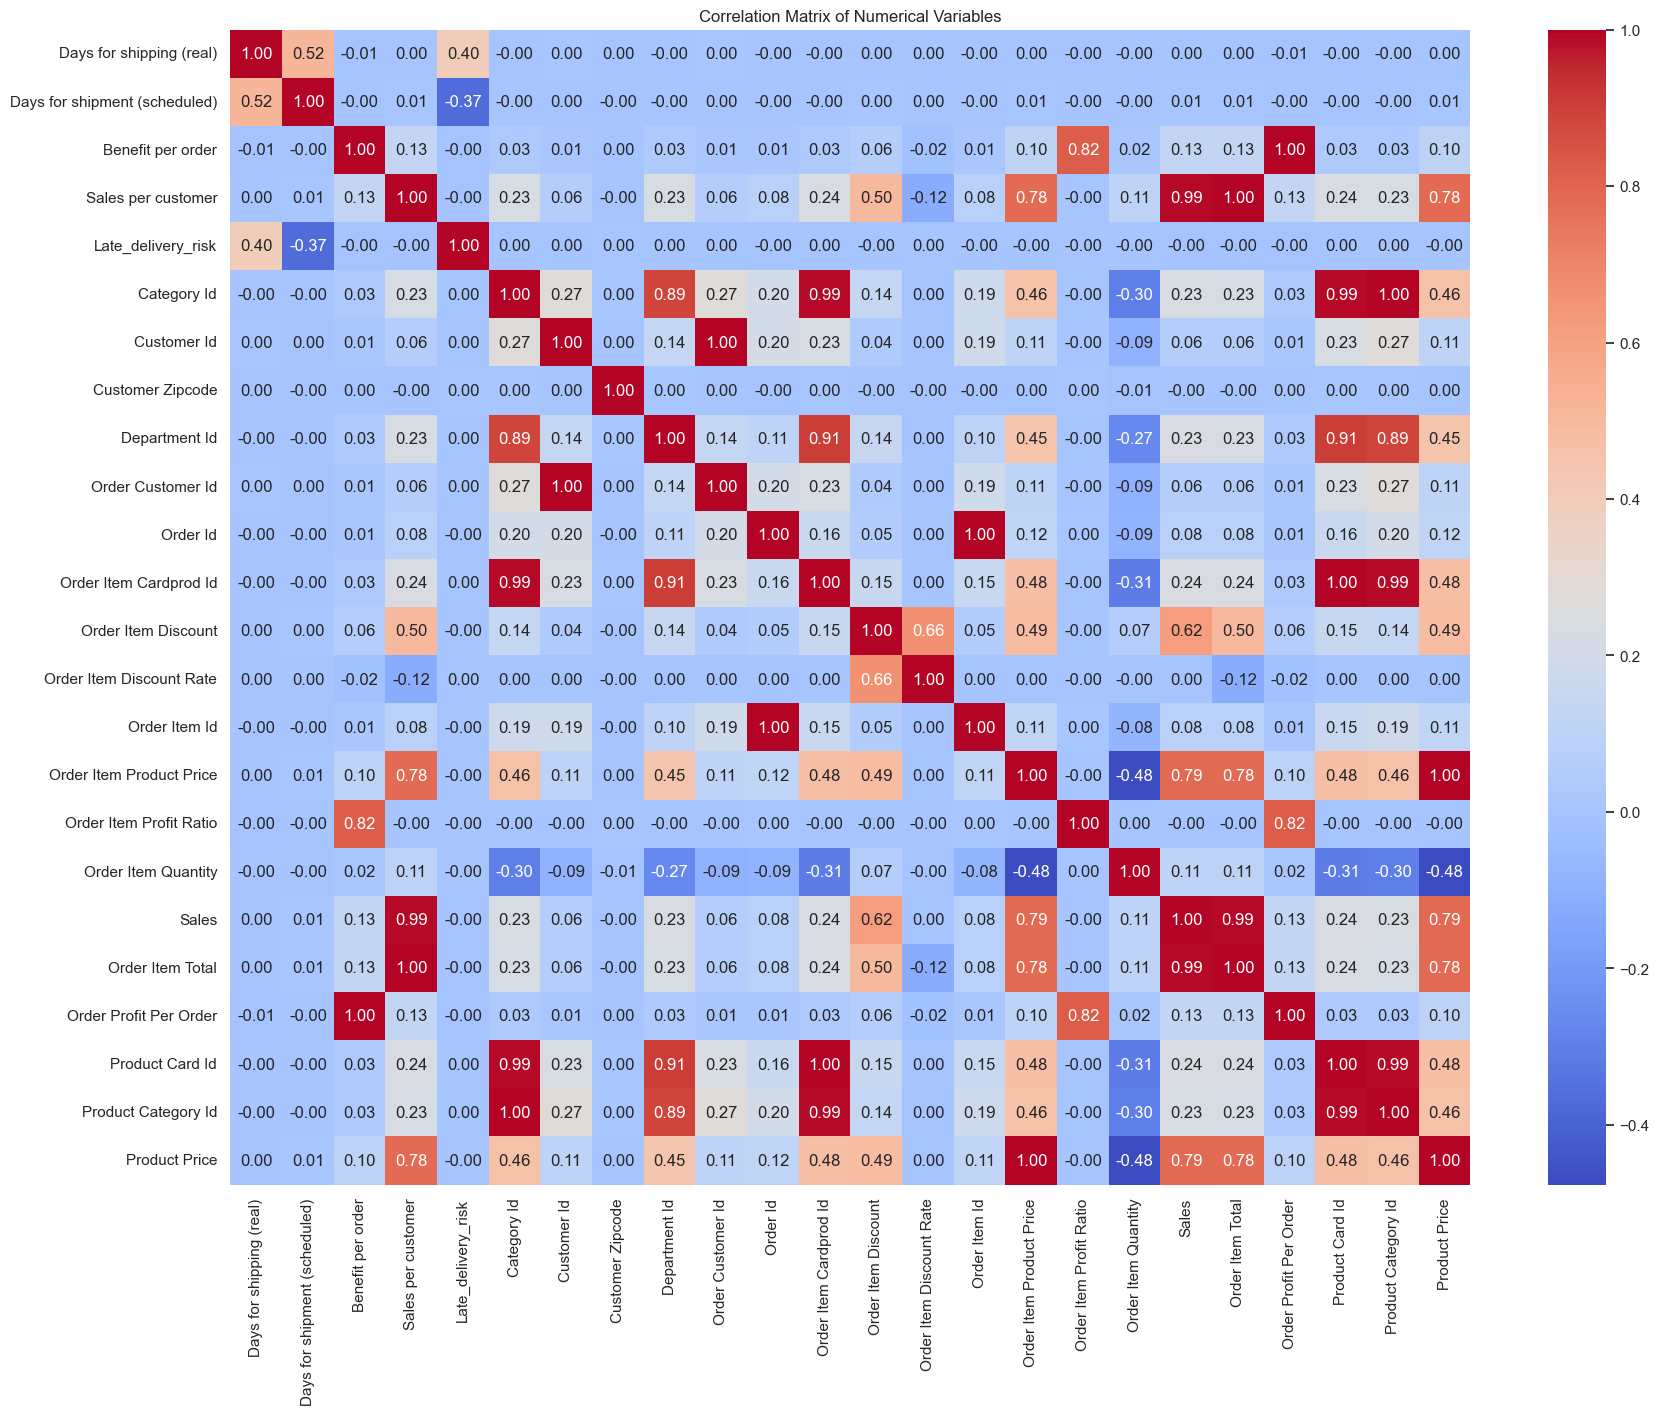

In [14]:
# Correlation Matrix
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [15]:
# We will create a baseline for loss if the Benifit per order is less than 0

loss = data[data['Benefit per order']<0]
loss['Category Name'].value_counts().nlargest(10)


Category Name
Cleats                  4590
Men's Footwear          4169
Women's Apparel         3923
Indoor/Outdoor Games    3617
Fishing                 3209
Water Sports            2924
Camping & Hiking        2590
Cardio Equipment        2332
Shop By Sport           2154
Electronics              562
Name: count, dtype: int64

In [16]:

loss['Market'].value_counts().nlargest(10)


Market
LATAM           9588
Europe          9420
Pacific Asia    7806
USCA            4812
Africa          2158
Name: count, dtype: int64

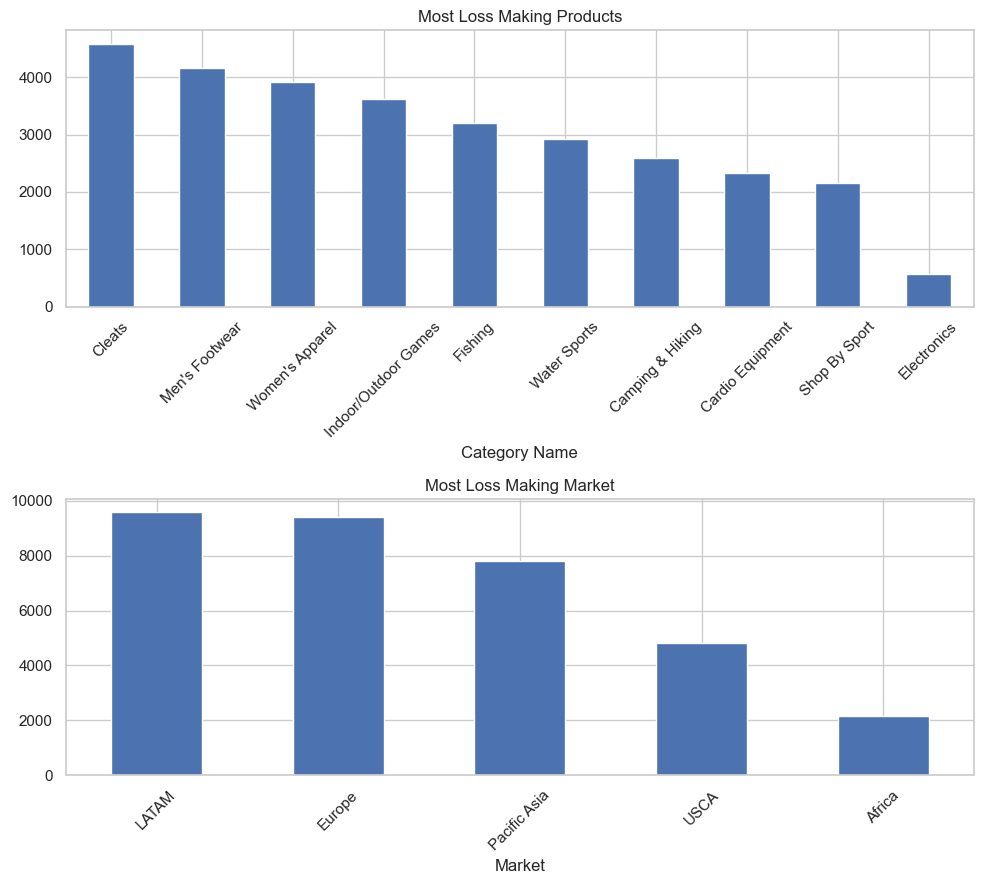

In [17]:

# Setting up the figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 9))  # Adjusting the size for better visibility

# Plotting the Most Loss Making Products
loss['Category Name'].value_counts().nlargest(10).plot.bar(ax=axs[0])
axs[0].set_title("Most Loss Making Products")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)


# Plotting the Most Loss Making Markets
loss['Market'].value_counts().nlargest(10).plot.bar(ax=axs[1])
axs[1].set_title("Most Loss Making Market")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [18]:

# Grouping order status by payment type

status = data.groupby('Type')['Order Status'].value_counts()

status_df = pd.DataFrame(status)

status_df


count
Type     Order Status          
CASH     CLOSED           19616
DEBIT    COMPLETE         59491
         ON_HOLD           9804
PAYMENT  PENDING_PAYMENT  39832
         PAYMENT_REVIEW    1893
TRANSFER PROCESSING       21902
         PENDING          20227
         SUSPECTED_FRAUD   4062
         CANCELED          3692

In [19]:

# Now using the suspected fraud to know the products with most fraud cases

fraud_region = data[data['Order Status'] == 'SUSPECTED_FRAUD']


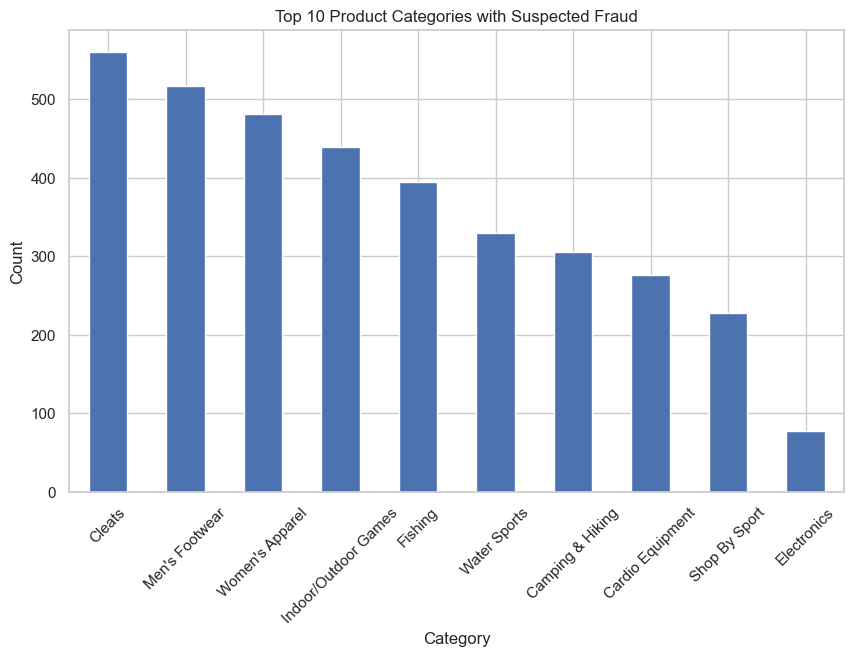

In [20]:

# Getting the counts of the top 10 categories
temp = fraud_region['Category Name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))  # Setting the figure size

# Creating the bar plot
temp.plot(kind='bar')

# Adding titles and labels
plt.title('Top 10 Product Categories with Suspected Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the x-ticks for better readability

# Displaying the plot
plt.show()

# Prepping Data for Model

since our dataset is so huge and it takes a lot of compute I reducing the dataset to a smaller size this is due to the lack of compute but I tried to capture maximum amount of information in this smaller dataset 

In [21]:

data = data.sample(n=100000, random_state=45)

In [22]:
# Create a 'flagged' column for suspected fraud

data['flagged'] = np.where(
    (data['Order Status'] == 'SUSPECTED_FRAUD') | 
    ((data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Delivery Status'] == 'Late delivery')), 1, 0
)




# Drop rows with missing values in 'Customer Zipcode'
data = data.dropna(subset=['Customer Zipcode'])


In [23]:
data.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Category Id,Product Name,Product Price,Shipping Mode,Cust_Full_Name,order_yr,order_month,order_day,order_hour,flagged
24058,CASH,6,4,24.290001,80.970001,Late delivery,1,44,Hunting & Shooting,Buffalo,...,44,ENO Atlas Hammock Straps,29.990000,Standard Class,MaryMoss,2015,1,4,18,0
112001,DEBIT,2,2,19.540001,84.970001,Shipping on time,0,46,Indoor/Outdoor Games,Caguas,...,46,O'Brien Men's Neoprene Life Vest,49.980000,Second Class,JonathanWilson,2016,11,0,2,0
10807,TRANSFER,2,1,2.630000,21.000000,Late delivery,1,26,Girls' Apparel,Caguas,...,26,adidas Men's Germany Black Crest Away Tee,25.000000,First Class,DebraSnow,2015,4,4,21,0
112851,PAYMENT,2,1,-20.990000,167.929993,Late delivery,1,46,Indoor/Outdoor Games,Washington,...,46,O'Brien Men's Neoprene Life Vest,49.980000,First Class,MarySmith,2016,10,5,20,0
140846,CASH,6,4,79.370003,283.480011,Late delivery,1,43,Camping & Hiking,Caguas,...,43,Diamondback Women's Serene Classic Comfort Bi,299.980011,Standard Class,BobbyCrawford,2016,8,2,2,0


In [24]:
data.tail(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Category Id,Product Name,Product Price,Shipping Mode,Cust_Full_Name,order_yr,order_month,order_day,order_hour,flagged
85911,TRANSFER,6,4,27.000000,53.990002,Late delivery,1,17,Cleats,Palatine,...,17,Perfect Fitness Perfect Rip Deck,59.990002,Standard Class,MarySmith,2017,5,0,8,0
111855,DEBIT,2,1,10.000000,99.959999,Late delivery,1,46,Indoor/Outdoor Games,Caguas,...,46,O'Brien Men's Neoprene Life Vest,49.980000,First Class,MarySmith,2016,12,1,4,0
65016,DEBIT,3,2,-16.950001,103.989998,Late delivery,1,18,Men's Footwear,Waukegan,...,18,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,Second Class,MaryPerez,2015,12,3,8,0
107853,PAYMENT,2,4,15.200000,172.770004,Advance shipping,0,17,Cleats,Round Rock,...,17,Perfect Fitness Perfect Rip Deck,59.990002,Standard Class,JoseWright,2017,2,3,0,0
5046,TRANSFER,3,4,101.910004,391.959992,Advance shipping,0,9,Cardio Equipment,Newark,...,9,Nike Men's Free 5.0+ Running Shoe,99.989998,Standard Class,MarthaSmith,2016,2,1,1,0


In [25]:
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Category Id,Product Name,Product Price,Shipping Mode,Cust_Full_Name,order_yr,order_month,order_day,order_hour,flagged
24058,CASH,6,4,24.290001,80.970001,Late delivery,1,44,Hunting & Shooting,Buffalo,...,44,ENO Atlas Hammock Straps,29.990000,Standard Class,MaryMoss,2015,1,4,18,0
112001,DEBIT,2,2,19.540001,84.970001,Shipping on time,0,46,Indoor/Outdoor Games,Caguas,...,46,O'Brien Men's Neoprene Life Vest,49.980000,Second Class,JonathanWilson,2016,11,0,2,0
10807,TRANSFER,2,1,2.630000,21.000000,Late delivery,1,26,Girls' Apparel,Caguas,...,26,adidas Men's Germany Black Crest Away Tee,25.000000,First Class,DebraSnow,2015,4,4,21,0
112851,PAYMENT,2,1,-20.990000,167.929993,Late delivery,1,46,Indoor/Outdoor Games,Washington,...,46,O'Brien Men's Neoprene Life Vest,49.980000,First Class,MarySmith,2016,10,5,20,0
140846,CASH,6,4,79.370003,283.480011,Late delivery,1,43,Camping & Hiking,Caguas,...,43,Diamondback Women's Serene Classic Comfort Bi,299.980011,Standard Class,BobbyCrawford,2016,8,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85911,TRANSFER,6,4,27.000000,53.990002,Late delivery,1,17,Cleats,Palatine,...,17,Perfect Fitness Perfect Rip Deck,59.990002,Standard Class,MarySmith,2017,5,0,8,0
111855,DEBIT,2,1,10.000000,99.959999,Late delivery,1,46,Indoor/Outdoor Games,Caguas,...,46,O'Brien Men's Neoprene Life Vest,49.980000,First Class,MarySmith,2016,12,1,4,0
65016,DEBIT,3,2,-16.950001,103.989998,Late delivery,1,18,Men's Footwear,Waukegan,...,18,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,Second Class,MaryPerez,2015,12,3,8,0
107853,PAYMENT,2,4,15.200000,172.770004,Advance shipping,0,17,Cleats,Round Rock,...,17,Perfect Fitness Perfect Rip Deck,59.990002,Standard Class,JoseWright,2017,2,3,0,0


In [26]:
data['flagged'].value_counts()

flagged
0    97768
1     2231
Name: count, dtype: int64

to address this imbalance lets encode the text variables then lets split the data based on the flagged variables finally we will be using standard scaler to standardize our numerical features 

to maintain the balance of data we will proceed to use stratify for out test and train split and use ADSYN to help with the imbalance of data

In [27]:

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Label encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Separate features (X) and target (y)
X = data.drop('flagged', axis=1)
y = data['flagged']

# Fill missing values in numerical features with the mean value
numerical_features = X.select_dtypes(include=['number']).columns
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())

# Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Stratify the split to ensure balanced classes in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply ADASYN to handle class imbalance in the training data
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

# Convert data to tensors
dataset = {
    'train_input': torch.tensor(X_train_res.values.astype('float32')),
    'test_input': torch.tensor(X_test.values.astype('float32')),
    'train_label': torch.tensor(y_train_res.values.astype('float32')).view(-1, 1),
    'test_label': torch.tensor(y_test.values.astype('float32')).view(-1, 1)
}


In [28]:
y.value_counts()

flagged
0    97768
1     2231
Name: count, dtype: int64

In [29]:
dataset['train_input'].shape

torch.Size([156140, 46])

In [30]:
print(dataset)

{'train_input': tensor([[-0.6778, -1.5353, -2.1272,  ..., -0.6605, -0.5042,  0.5073],
        [-0.6778,  0.3137, -0.6747,  ...,  0.5149,  0.4929, -1.6593],
        [ 1.3304,  0.9300,  0.7778,  ...,  1.6903,  0.4929, -0.0704],
        ...,
        [ 1.3304, -0.9190, -1.4009,  ..., -0.8330, -1.3641, -1.2511],
        [ 1.3304, -0.6069, -1.0332,  ..., -0.5079, -0.4916, -1.4435],
        [ 1.3304, -0.9190, -1.4009,  ..., -0.7162, -1.5014, -1.1697]]), 'test_input': tensor([[-1.6819,  1.5463, -0.6747,  ..., -0.6605,  1.4900, -1.5148],
        [-0.6778, -0.3027, -0.6747,  ...,  0.5149, -0.0057, -0.5037],
        [-0.6778,  0.9300,  0.7778,  ..., -0.0728,  0.4929, -0.9371],
        ...,
        [-0.6778, -0.9190, -1.4009,  ..., -1.2481, -1.0028, -1.5148],
        [-0.6778, -0.3027, -0.6747,  ...,  0.8088,  0.9914, -0.5037],
        [ 1.3304,  0.9300, -0.6747,  ..., -0.0728,  0.4929, -1.2259]]), 'train_label': tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
  

In [31]:

# Confirm the shapes of tensors
print(dataset['train_input'].shape, dataset['train_label'].shape)
print(dataset['test_input'].shape, dataset['test_label'].shape)


torch.Size([156140, 46]) torch.Size([156140, 1])
torch.Size([20000, 46]) torch.Size([20000, 1])


In [32]:

# Model training setup (example using KAN library)
from kan import KAN

model = KAN(width=[X_train_res.shape[1], 6, 2], grid=3, k=3)

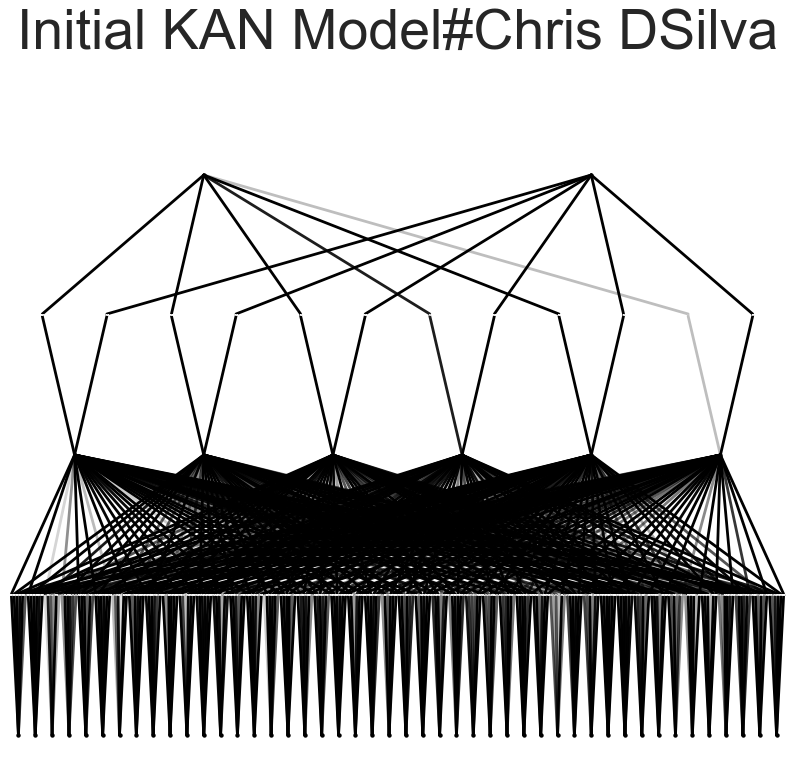

In [33]:
# Initial plot of the model
model(dataset['train_input'])  # Perform a forward pass to initialize
model.plot(beta=100, scale=1, title='Initial KAN Model#Chris DSilva')  # Adjust beta and scale as needed

In [34]:
# Define accuracy functions
def train_acc():
    with torch.no_grad():
        preds = torch.argmax(model(dataset['train_input']), dim=1)
        targets = torch.argmax(dataset['train_label'], dim=1)
        return torch.mean((preds == targets).float())

def test_acc():
    with torch.no_grad():
        preds = torch.argmax(model(dataset['test_input']), dim=1)
        targets = torch.argmax(dataset['test_label'], dim=1)
        return torch.mean((preds == targets).float())

# Training with step-wise iteration and logging
optimizer = torch.optim.LBFGS(model.parameters(), lr=0.01)
steps = 5
metrics = (train_acc, test_acc)
results = {'train_acc': [], 'test_acc': [], 'train_loss': [], 'test_loss': []}

criterion = torch.nn.CrossEntropyLoss()

for step in range(steps):
    def closure():
        optimizer.zero_grad()
        outputs = model(dataset['train_input'])
        loss = criterion(outputs, torch.argmax(dataset['train_label'], dim=1))
        loss.backward()
        return loss

    optimizer.step(closure)

    # Evaluate and store metrics
    train_loss = criterion(model(dataset['train_input']), torch.argmax(dataset['train_label'], dim=1)).item()
    test_loss = criterion(model(dataset['test_input']), torch.argmax(dataset['test_label'], dim=1)).item()
    results['train_loss'].append(train_loss)
    results['test_loss'].append(test_loss)
    results['train_acc'].append(train_acc().item())
    results['test_acc'].append(test_acc().item())

    print(f"Step {step + 1}: Train Loss: {train_loss}, Test Loss: {test_loss}, Train Acc: {results['train_acc'][-1]}, Test Acc: {results['test_acc'][-1]}")


Step 1: Train Loss: 0.3012460768222809, Test Loss: 0.3235909044742584, Train Acc: 0.9972652792930603, Test Acc: 0.9950000047683716
Step 2: Train Loss: 0.15045227110385895, Test Loss: 0.16917064785957336, Train Acc: 0.9999871850013733, Test Acc: 1.0
Step 3: Train Loss: 0.08165179193019867, Test Loss: 0.09475772082805634, Train Acc: 1.0, Test Acc: 1.0
Step 4: Train Loss: 0.04898199066519737, Test Loss: 0.05849986523389816, Train Acc: 1.0, Test Acc: 1.0
Step 5: Train Loss: 0.03203829005360603, Test Loss: 0.039206285029649734, Train Acc: 1.0, Test Acc: 1.0


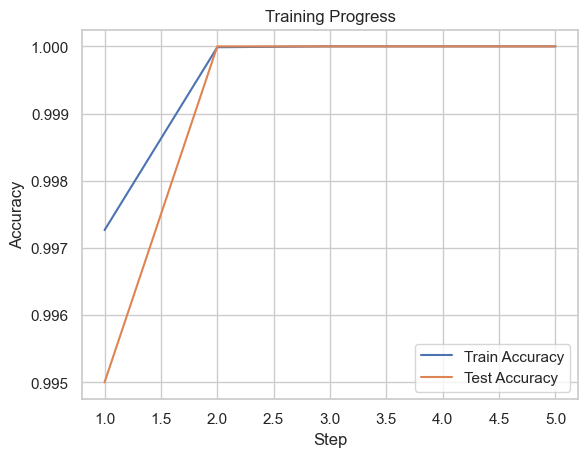

In [35]:

# Plot results
plt.plot(range(1, steps + 1), results['train_acc'], label='Train Accuracy')
plt.plot(range(1, steps + 1), results['test_acc'], label='Test Accuracy')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Progress')
plt.show()

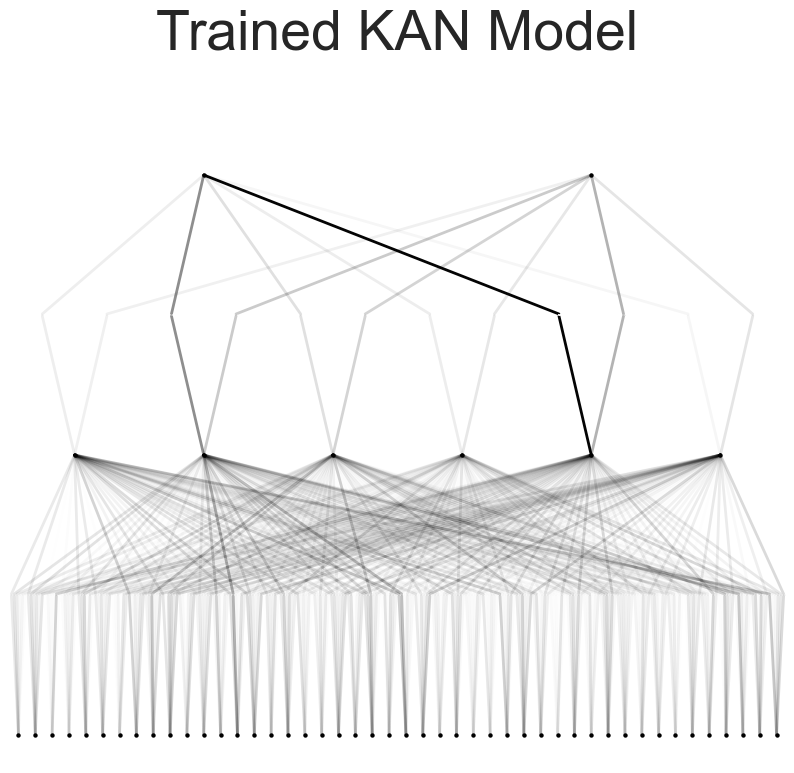

In [36]:

# Plot the model after training
model.plot(beta=2, scale=1, title='Trained KAN Model')


In [37]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)


fixing (0,0,0) with tanh, r2=1.0000004768371582
fixing (0,0,1) with sin, r2=1.0000003576278687
fixing (0,0,2) with tanh, r2=1.0000004768371582
fixing (0,0,3) with tanh, r2=0.9999976754188538
fixing (0,0,4) with sin, r2=1.0000004768371582
fixing (0,0,5) with tanh, r2=1.0000005960464478
fixing (0,1,0) with x^2, r2=0.9962543249130249
fixing (0,1,1) with x^2, r2=0.9988176226615906
fixing (0,1,2) with x^2, r2=0.9943291544914246
fixing (0,1,3) with x^2, r2=0.9987630248069763
fixing (0,1,4) with sin, r2=0.9954671859741211
fixing (0,1,5) with sin, r2=0.9985784292221069
fixing (0,2,0) with sin, r2=1.0000001192092896
fixing (0,2,1) with tan, r2=1.0000003576278687
fixing (0,2,2) with sin, r2=1.0000003576278687
fixing (0,2,3) with tan, r2=1.0000003576278687
fixing (0,2,4) with tan, r2=0.9999385476112366
fixing (0,2,5) with tan, r2=1.000000238418579
fixing (0,3,0) with tanh, r2=0.824454665184021
fixing (0,3,1) with tanh, r2=0.9747172594070435
fixing (0,3,2) with tanh, r2=0.9732287526130676
fixing (

In [38]:

formula1,formula2 = model.symbolic_formula()[0]

In [39]:
formula1

67.96*sqrt(0.01*sqrt(1 - 0.79*x_7) - 0.02*sin(0.4*x_16 - 4.19) + 0.01*sin(0.62*x_22 + 8.41) - 0.05*sin(0.19*x_25 + 8.21) + 0.02*sin(9.56*x_30 - 0.43) + 0.01*sin(0.36*x_31 + 8.25) - 0.03*sin(0.32*x_32 - 7.54) - 0.01*sin(5.53*x_43 + 1.72) - 0.03*sin(0.24*x_5 + 1.94) - 0.01*sin(0.53*x_8 - 1.04) + 0.01*tanh(0.58*x_10 - 1.09) + 0.01*tanh(0.49*x_21 - 1.13) + 0.01*tanh(0.83*x_23 - 1.0) + 0.01*tanh(0.51*x_27 - 1.08) + 0.03*tanh(0.35*x_28 - 1.39) + 0.02*tanh(0.41*x_33 - 1.12) + 0.01*tanh(0.8*x_34 - 0.86) - 0.09*tanh(0.62*x_35 - 3.2) + 0.01*tanh(0.93*x_36 - 1.0) + 0.01*tanh(0.76*x_46 - 0.9) - 0.02*Abs(9.28*x_11 - 2.28) + 1) + 1.7*sin(-0.01*(-0.66*x_18 - 1)**2 - 0.e-2*(-0.8*x_2 - 1)**2 + 0.01*(-0.79*x_42 - 1)**2 - 0.02*exp(0.67*x_27) + 0.04*sin(0.54*x_12 - 7.22) - 0.e-2*sin(1.45*x_14 + 3.05) + 0.03*sin(0.7*x_15 + 5.45) + 0.09*sin(0.39*x_16 - 1.18) + 0.37*sin(0.19*x_25 - 1.19) + 0.46*sin(0.29*x_31 - 7.49) - 0.04*sin(0.28*x_32 - 7.47) + 0.15*sin(0.4*x_35 - 7.41) + 0.34*sin(0.29*x_36 - 7.52) + 0.01*

In [40]:
formula2

24.71*exp(0.01*sin(0.19*x_25 + 8.21) - 0.e-2*tanh(0.35*x_28 - 1.39) + 0.02*tanh(0.62*x_35 - 3.2)) - 2.12*sin(-0.01*(-0.66*x_18 - 1)**2 - 0.e-2*(-0.8*x_2 - 1)**2 + 0.01*(-0.79*x_42 - 1)**2 - 0.02*exp(0.67*x_27) + 0.04*sin(0.54*x_12 - 7.22) - 0.e-2*sin(1.45*x_14 + 3.05) + 0.03*sin(0.7*x_15 + 5.45) + 0.09*sin(0.39*x_16 - 1.18) + 0.39*sin(0.19*x_25 - 1.19) - 0.e-2*sin(7.0*x_3 - 1.4) + 0.48*sin(0.29*x_31 - 7.49) - 0.04*sin(0.28*x_32 - 7.47) + 0.16*sin(0.4*x_35 - 7.41) + 0.36*sin(0.29*x_36 - 7.52) + 0.01*sin(0.65*x_38 + 8.62) - 0.18*sin(0.29*x_40 - 4.34) - 0.38*sin(0.19*x_44 + 4.98) + 0.43*sin(0.27*x_5 - 7.48) - 1.27*sin(0.1*x_8 + 1.69) + 1.14*sin(0.21*x_9 + 1.81) - 0.12*tanh(0.72*x_1 - 1.59) - 0.13*tanh(0.56*x_10 - 0.98) + 0.15*tanh(0.35*x_17 - 1.27) + 0.05*tanh(0.98*x_19 - 1.0) - 0.05*tanh(0.7*x_20 - 0.96) - 0.11*tanh(0.92*x_22 - 0.96) + 0.01*tanh(1.83*x_23 - 1.77) + 0.03*tanh(1.04*x_26 - 1.17) + 0.07*tanh(0.14*x_28 - 0.75) - 0.01*tanh(1.69*x_29 - 1.11) - 0.01*tanh(1.4*x_30 - 1.32) + 0.04*

In [41]:

# Function to calculate accuracy of symbolic formula
import sympy as sp

def acc(formula, X, y):
    batch = X.shape[0]
    correct = 0
    # Convert your formula to a function that can accept NumPy arrays
    formula_func = sp.lambdify([sp.symbols(f'x_{i+1}') for i in range(X.shape[1])], formula, "numpy")
    for i in range(batch):
        prediction = formula_func(*X[i])  # Calculate the formula result
        correct += (np.round(prediction) == y[i])
    return correct / batch

# Calculate accuracy of the formula1 on training and testing data
train_accuracy = acc(formula1, dataset['train_input'].numpy(), dataset['train_label'].numpy())
test_accuracy = acc(formula1, dataset['test_input'].numpy(), dataset['test_label'].numpy())

# Calculate accuracy of the formula2 on training and testing data
train_accuracy2 = acc(formula2, dataset['train_input'].numpy(), dataset['train_label'].numpy())
test_accuracy2 = acc(formula2, dataset['test_input'].numpy(), dataset['test_label'].numpy())


In [42]:

print('Train accuracy of the formula 1: ', train_accuracy)
print( 'Test accuracy of the formula 1:', test_accuracy)

Train accuracy of the formula 1:  [6.40450877e-06]
Test accuracy of the formula 1: [0.]


In [43]:

print('Train accuracy of the formula 2: ', train_accuracy2)
print( 'Test accuracy of the formula 2:', test_accuracy2)

Train accuracy of the formula 2:  [0.00888305]
Test accuracy of the formula 2: [0.01695]


We will proceed with formula 1 as it has a higher accuracy on the test data.

# Visulizing the Model

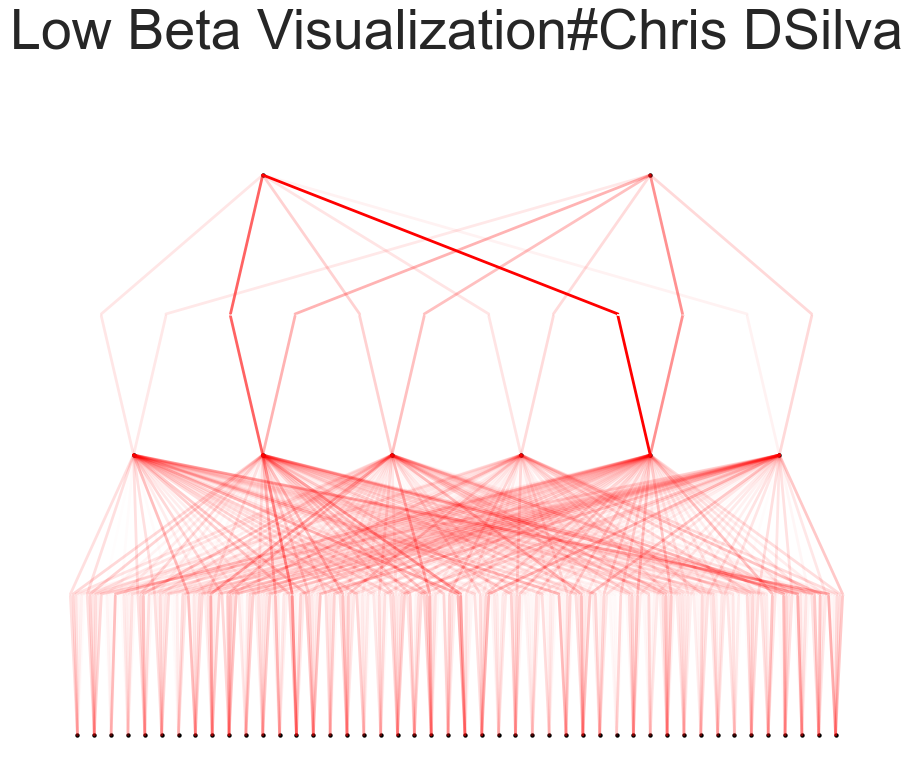

In [44]:
model.plot(beta=3, scale=1, title='Low Beta Visualization#Chris DSilva')

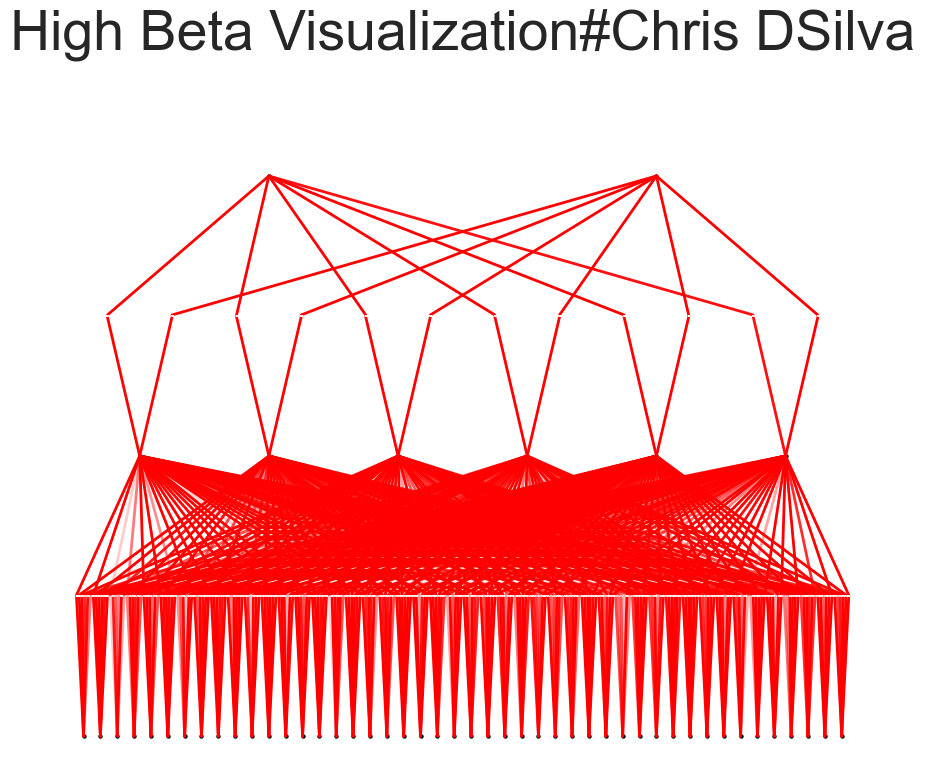

In [45]:
model.plot(beta=100, scale=1, title='High Beta Visualization#Chris DSilva')

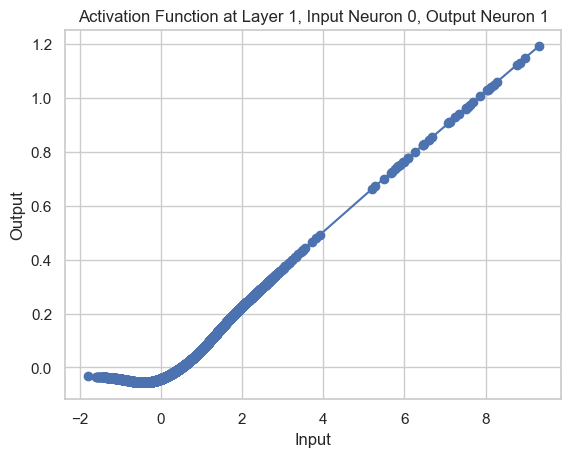

In [46]:
# Example: Extracting activation functions for a specific layer, input neuron, and output neuron
l = 1  # Layer index (first hidden layer)
i = 0  # Input neuron index in layer l (first input neuron in this case)
j = 1  # Output neuron index in layer l (first output neuron in this case)

# Extract inputs and outputs of the spline activation functions
inputs = model.spline_preacts[l][:, j, i]
outputs = model.spline_postacts[l][:, j, i]

# Sort the inputs and corresponding outputs for plotting
rank = np.argsort(inputs)
inputs = inputs[rank]
outputs = outputs[rank]

# Plot the activation function
plt.figure()
plt.plot(inputs, outputs, marker="o")
plt.title(f'Activation Function at Layer {l}, Input Neuron {i}, Output Neuron {j}')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

# Model Pruning

In [51]:
model2 = model.prune(threshold=1e-4)
model2(dataset['train_input'])

tensor([[ 2.5482e+00, -2.3173e-01],
        [ 1.7772e+00, -3.5410e-01],
        [ 5.9655e+00,  1.0775e+00],
        ...,
        [ 5.8687e+00,  2.7877e-03],
        [ 4.4513e+00,  4.7122e-01],
        [ 3.6323e+00,  1.6560e-01]], grad_fn=<AddBackward0>)

ValueError: alpha (nan) is outside 0-1 range

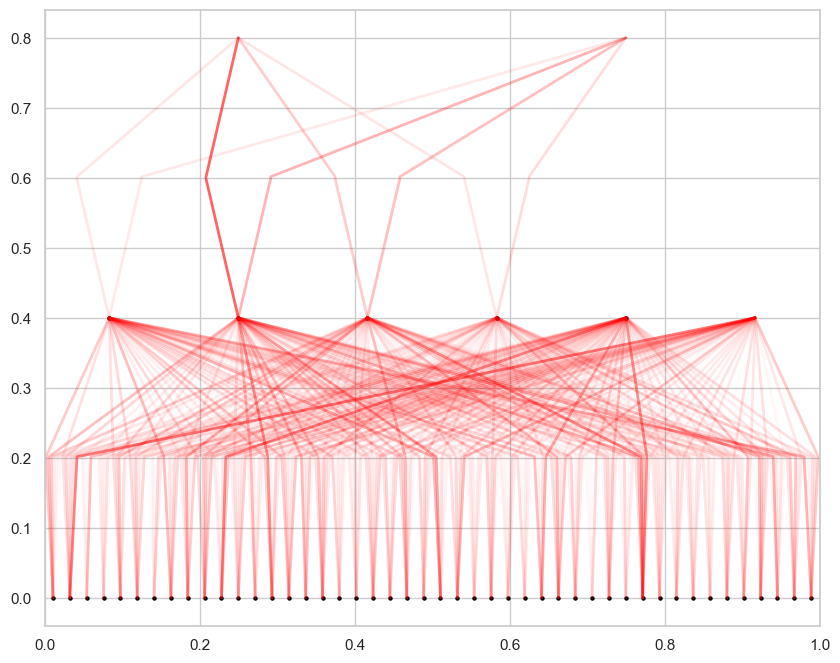

In [54]:
model2.plot(scale=1,title='Pruned Model#Chris DSilva')

since theres an issue with the pruned model lets proceed with the original model.

Example: Extracting activation functions for a specific layer, input neuron, and output neuron
l = 1  # Layer index (first hidden layer)
i = 1  # Input neuron index in layer l (first input neuron in this case)
j = 1  # Output neuron index in layer l (first output neuron in this case)

First Part: Activation Functions for the Middle Neurons in the First Hidden Layer

* Objective: Plot activation functions for the middle neurons in the first hidden layer.
* Setup: A 2x6 grid (2 rows, 6 columns) for plotting.
* Loop: Iterate over input neurons (i = 0 and i = 1) and middle neurons (j = 0 to 5).
* Layer: l = 1 corresponds to the first hidden layer.
* Extraction: Extract spline_preacts and spline_postacts for the specified neurons.
* Sorting: Sort inputs and corresponding outputs for better visualization.
* Plotting: Plot the activation function for each combination in the grid.


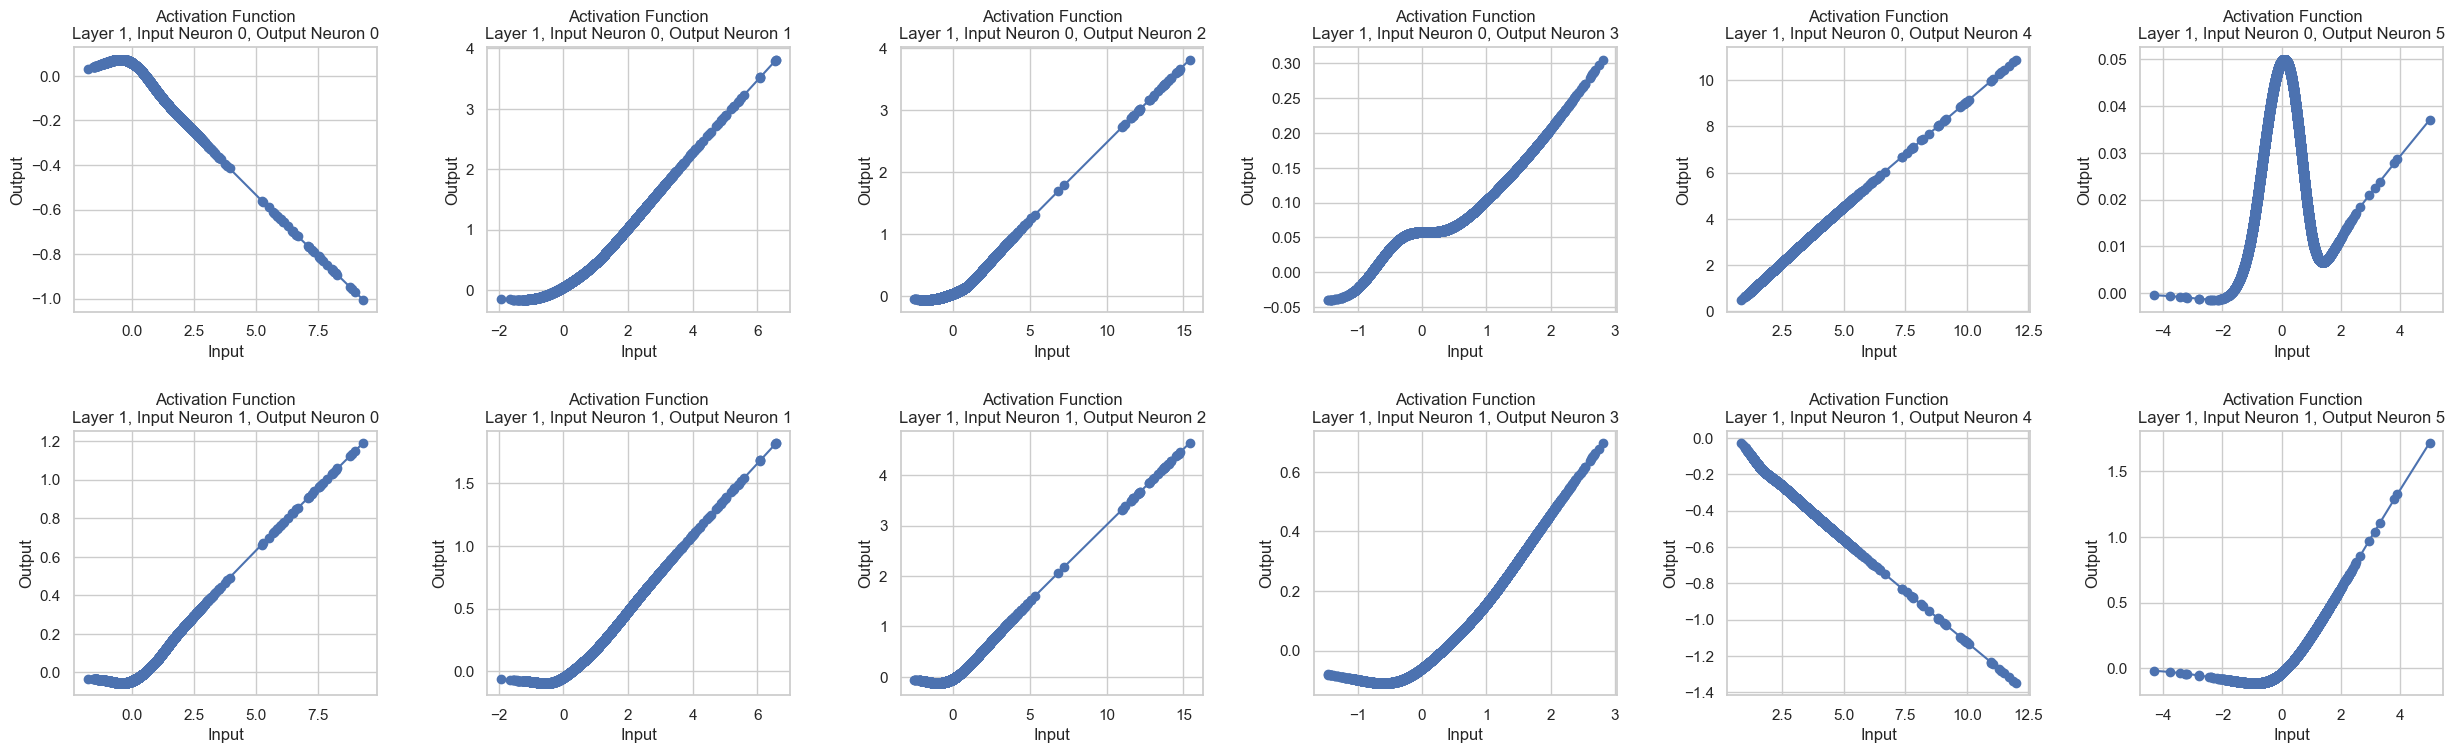

In [49]:
# Create a 2x6 grid for plotting (2 rows, 6 columns)
fig, axs = plt.subplots(2, 6, figsize=(25, 8))
middle_neurons = [0, 1, 2, 3, 4, 5]  # Output neurons in the first hidden layer

for row, i in enumerate([0, 1]):  # Input neurons i = 0 and i = 1
    for col, j in enumerate(middle_neurons):
        l = 1  # Layer index (first hidden layer)

        # Extract inputs and outputs of the spline activation functions
        inputs = model.spline_preacts[l][:, i, j]
        outputs = model.spline_postacts[l][:, i, j]

        # Sort the inputs and corresponding outputs for plotting
        rank = np.argsort(inputs)
        inputs = inputs[rank]
        outputs = outputs[rank]

        # Determine subplot location
        ax = axs[row, col]

        # Plot the activation function
        ax.plot(inputs, outputs, marker="o")
        ax.set_title(f'Activation Function\nLayer {l}, Input Neuron {i}, Output Neuron {j}')
        ax.set_xlabel('Input')
        ax.set_ylabel('Output')
        ax.grid(True)

plt.tight_layout(pad=2)
plt.show()

Second Part: Activation Functions Between the First Hidden Layer and the Output Layer

* Objective: Plot activation functions for the neurons between the first hidden layer and the output layer.
* Setup: A 6x2 grid (6 rows, 2 columns) for plotting.
* Loop: Iterate over hidden neurons (i = 0 to 5) and output neurons (j = 0 and j = 1).
* Layer: l = 1 corresponds to the output layer.
* Extraction: Extract spline_preacts and spline_postacts for the specified neurons.
* Sorting: Sort inputs and corresponding outputs for better visualization.
* Plotting: Plot the activation function for each combination in the grid.

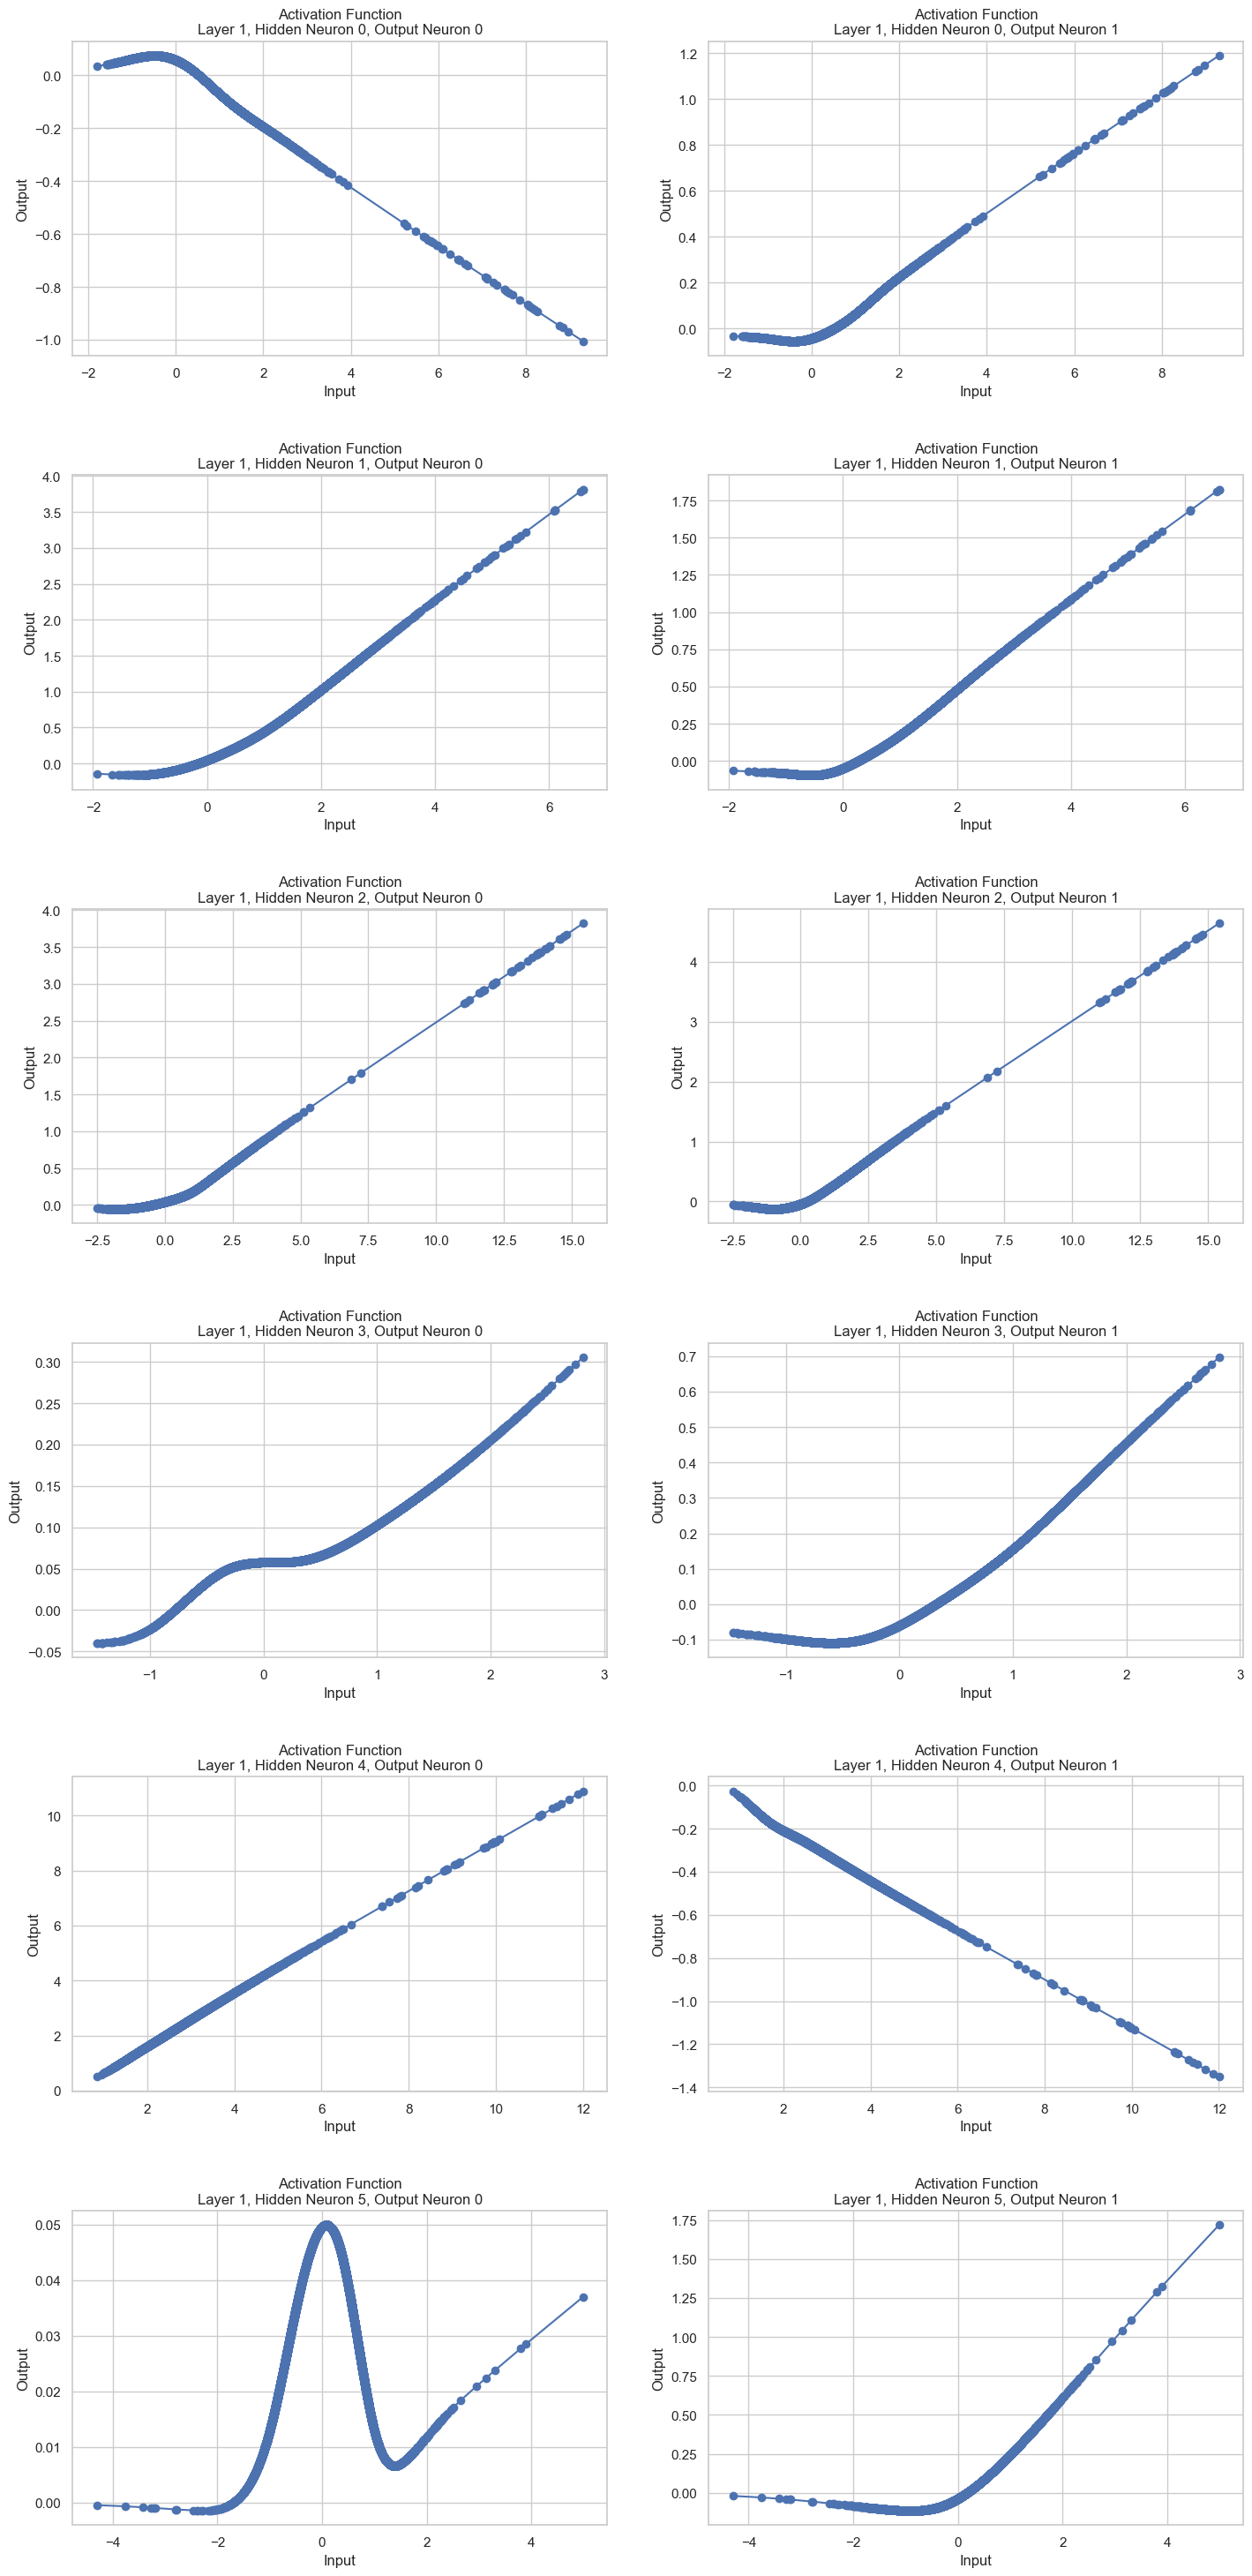

In [50]:
# Extract and plot activation functions for the neurons between the first hidden layer and the output layer
hidden_neurons = [0, 1, 2, 3, 4, 5]  # Neurons in the first hidden layer
output_neurons = [0, 1]  # Neurons in the output layer

# Create a 3x2 grid for plotting
fig, axs = plt.subplots(6, 2, figsize=(15, 30))

for row, i in enumerate(hidden_neurons):  # Neurons in the first hidden layer
    for col, j in enumerate(output_neurons):  # Neurons in the output layer
        l = 1  # Layer index (output layer)

        # Extract inputs and outputs of the spline activation functions
        inputs = model.spline_preacts[l][:, j, i]
        outputs = model.spline_postacts[l][:, j, i]

        # Sort the inputs and corresponding outputs for plotting
        rank = np.argsort(inputs)
        inputs = inputs[rank]
        outputs = outputs[rank]

        # Determine subplot location
        ax = axs[row, col]

        # Plot the activation function
        ax.plot(inputs, outputs, marker="o")
        ax.set_title(f'Activation Function\nLayer {l}, Hidden Neuron {i}, Output Neuron {j}')
        ax.set_xlabel('Input')
        ax.set_ylabel('Output')
        ax.grid(True)

# Add space between subplots
plt.tight_layout(pad=3.0)
plt.show()